In [ ]:
import zipfile
import os

zip_path ='/content/drive/MyDrive/Face Mask Dataset.zip'  # ← غيّر المسار لو مختلف
extract_to = '/content/data'  # المكان اللي هيتفك فيه

# فك الضغط
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# تأكد إن الصور اتحطت
print("المجلدات:", os.listdir(extract_to))


المجلدات: ['Face Mask Dataset']


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm

image_size with_mask (128, 128)


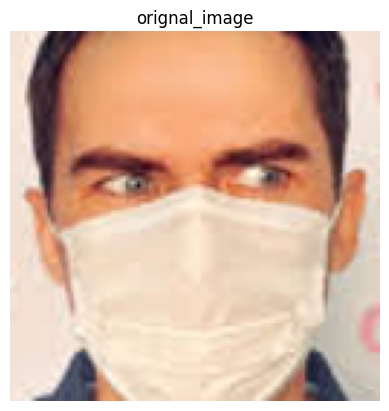

In [ ]:
img_path='/content/data/Face Mask Dataset/Train/WithMask/119.png'
img=Image.open(img_path)
img=img.resize((128,128))#after checking more than size found this size the_best
plt.imshow(img)
plt.title('orignal_image')
plt.axis('off')
print('image_size with_mask',img.size)
plt.show()

image_size without_mask (128, 128)


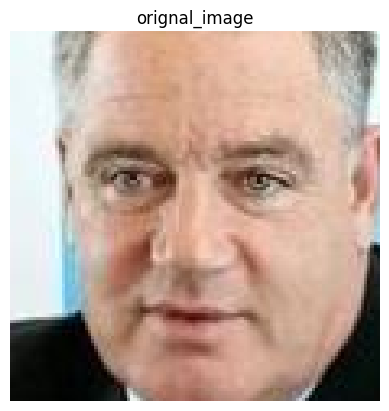

In [ ]:
image='/content/data/Face Mask Dataset/Train/WithoutMask/1227.png'
img=Image.open(image)
plt.imshow(img)
img=img.resize((128,128))#after checking more than size found this size the_best
plt.title('orignal_image')
plt.axis('off')
print('image_size without_mask',img.size)

In [ ]:
data_path='/content/data/Face Mask Dataset/Train'
categories=['WithMask','WithoutMask']

In [ ]:
data=[]
img_size=128
for category in categories:
  folder_path=os.path.join(data_path,category)
  label=categories.index(category)
  for img_name in os.listdir(folder_path):
    img_path=os.path.join(folder_path,img_name)
    try:
      img=cv2.imread(img_path)
      img=cv2.resize(img,(img_size,img_size))
      img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      data.append([img,label])
    except Exception as e:
        print(e)

In [ ]:
np.random.shuffle(data)
print(data[:5])

[[array([[  0,   0,   0, ...,   1,   1,   1],
       [  0,   0,   0, ...,   1,   2,   1],
       [  0,   0,   0, ...,   1,   4,   1],
       ...,
       [ 18,  17,  16, ..., 181, 185, 181],
       [ 19,  18,  17, ..., 194, 185, 183],
       [ 20,  18,  17, ..., 200, 192, 184]], dtype=uint8), 0], [array([[168, 166, 163, ...,  19,  19,  21],
       [168, 167, 165, ...,  18,  19,  20],
       [158, 163, 166, ...,  17,  18,  19],
       ...,
       [ 93,  95,  98, ..., 106, 104,  98],
       [ 94,  97, 100, ..., 105, 109, 102],
       [ 96,  97,  99, ...,  96, 115,  97]], dtype=uint8), 1], [array([[181, 183, 188, ...,  88,  88,  90],
       [184, 187, 194, ...,  90,  89,  92],
       [186, 190, 198, ...,  96,  95,  96],
       ...,
       [ 30,  29,  28, ...,  62,  63,  63],
       [ 30,  28,  28, ...,  60,  62,  62],
       [ 30,  28,  27, ...,  60,  62,  61]], dtype=uint8), 1], [array([[61, 61, 60, ..., 25, 19, 14],
       [61, 61, 61, ...,  0,  0,  0],
       [61, 61, 61, ...,  0,  0,  

In [ ]:
import random
random.shuffle(data)
X=[]
y=[]
for feature,label in data:
  X.append(feature)
  y.append(label)
print(X[:2])
print(y[:2])

[array([[255, 254, 254, ..., 228, 213, 190],
       [255, 254, 254, ..., 227, 218, 204],
       [254, 254, 254, ..., 223, 222, 216],
       ...,
       [225, 191, 185, ..., 124, 111, 112],
       [220, 188, 173, ..., 128,  95, 125],
       [217, 189, 167, ..., 136,  90, 133]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 254, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)]
[1, 0]


In [ ]:
X=np.array(X).reshape(-1,img_size,img_size,1)#1 bec it Gray_scale
y=np.array(y)
print(X.shape)
print(y.shape)

(10000, 128, 128, 1)
(10000,)


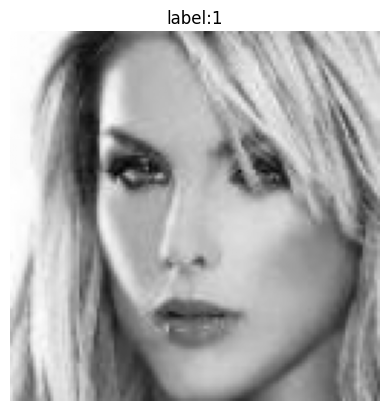

In [ ]:
plt.imshow(X[0].reshape(128,128),cmap='gray')
plt.title(f"label:{y[0]}")
plt.axis('off')
plt.show()

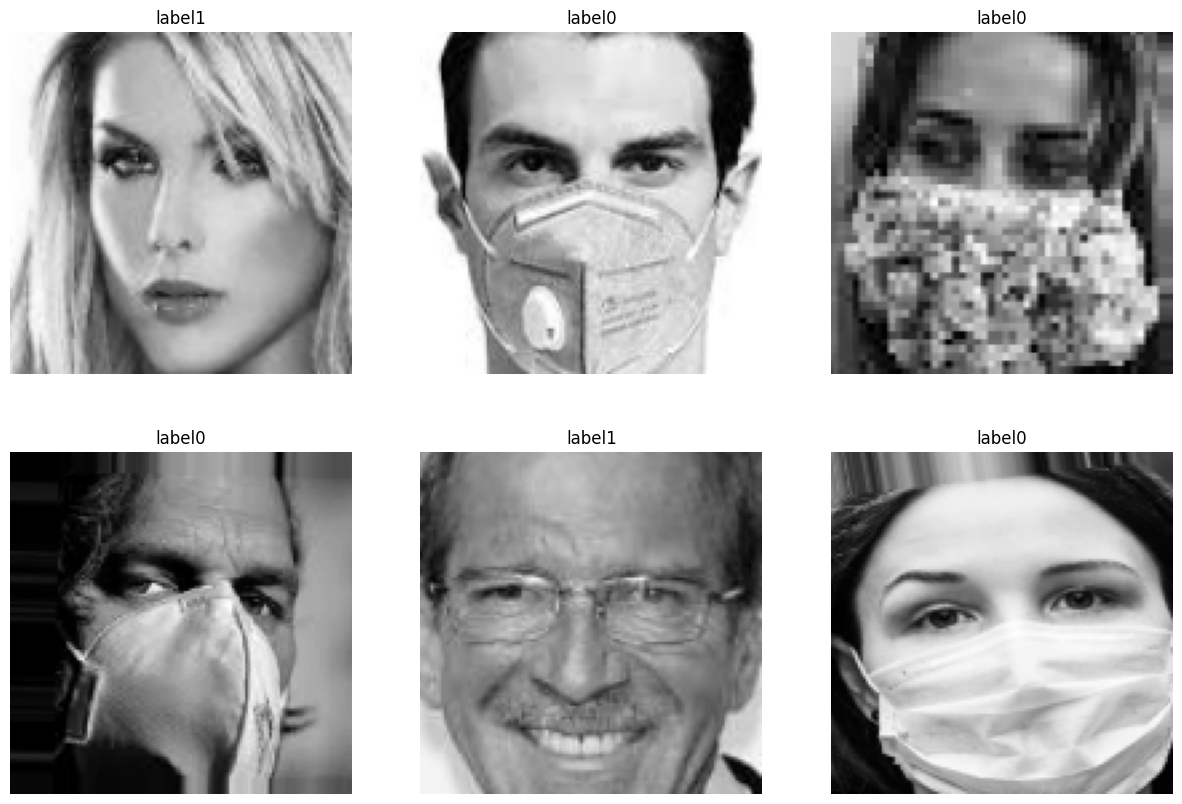

In [ ]:
plt.figure(figsize=(15,10))
for i in range (6):
  plt.subplot(2,3,i+1)
  plt.imshow(X[i].reshape(128,128),cmap='gray')
  plt.title(f"label{y[i]}")
  plt.axis('off')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print('traning_samples:',len(X_train))
print('testing_samples:',len(X_test))

traning_samples: 8000
testing_samples: 2000


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data_gen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.9,1.1),
    fill_mode='nearest'
)

In [ ]:
train_generator=train_data_gen.flow_from_directory(
    '/content/data/Face Mask Dataset/Train',
    target_size=(img_size,img_size),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale',
    shuffle=True
)

Found 10000 images belonging to 2 classes.


In [ ]:
test_val_data=ImageDataGenerator(rescale=1./255)
val_genrator=test_val_data.flow_from_directory(
    '/content/data/Face Mask Dataset/Validation',
    target_size=(img_size,img_size),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale',
    shuffle=True
)
test_genrator=test_val_data.flow_from_directory(
    '/content/data/Face Mask Dataset/Test',
    target_size=(img_size,img_size),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale',
    shuffle=False

)

Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.7),
        Dense(1, activation='sigmoid')
    ])
    return model

model = create_model()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
early_stopping=EarlyStopping(monitor='val_accuracy',patience=10,verbose=1,restore_best_weights=True)
checkpoint=ModelCheckpoint('best_model.h5',monitor='val_accuracy',verbose=1,save_best_only=True)
history=model.fit(
    train_generator,
    epochs=50,
    validation_data=val_genrator,
    callbacks=[early_stopping,checkpoint]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5258 - loss: 0.6864
Epoch 1: val_accuracy improved from -inf to 0.72875, saving model to best_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - accuracy: 0.5259 - loss: 0.6864 - val_accuracy: 0.7287 - val_loss: 0.5881
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6468 - loss: 0.6276
Epoch 2: val_accuracy improved from 0.72875 to 0.84000, saving model to best_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 335s 1s/step - accuracy: 0.6469 - loss: 0.6275 - val_accuracy: 0.8400 - val_loss: 0.4112
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7587 - loss: 0.5159
Epoch 3: val_accuracy improved from 0.84000 to 0.89000, saving model to best_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 322s 1s/step - accuracy: 0.7587 - loss: 0.5159 - val_accuracy: 0.8900 - val_loss: 0.2816
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8078 - loss: 0.4425
Epoch 4: val_accuracy improved from 0.89000 to 0.90625, saving model to best_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - accuracy: 0.8079 - loss: 0.4424 - val_accuracy: 0.9062 - val_loss: 0.2212
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8512 - loss: 0.3662
Epoch 5: val_accuracy improved from 0.90625 to 0.93375, saving model to best_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 324s 1s/step - accuracy: 0.8512 - loss: 0.3661 - val_accuracy: 0.9337 - val_loss: 0.1576
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8764 - loss: 0.3182
Epoch 6: val_accuracy improved from 0.93375 to 0.93875, saving model to best_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 331s 1s/step - accuracy: 0.8764 - loss: 0.3182 - val_accuracy: 0.9388 - val_loss: 0.1476
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 994ms/step - accuracy: 0.8811 - loss: 0.2921
Epoch 7: val_accuracy improved from 0.93875 to 0.94125, saving model to best_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 317s 1s/step - accuracy: 0.8811 - loss: 0.2920 - val_accuracy: 0.9413 - val_loss: 0.1235
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 991ms/step - accuracy: 0.8994 - loss: 0.2515
Epoch 8: val_accuracy improved from 0.94125 to 0.94750, saving model to best_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 317s 1s/step - accuracy: 0.8994 - loss: 0.2515 - val_accuracy: 0.9475 - val_loss: 0.1229
Epoch 9/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 994ms/step - accuracy: 0.9132 - loss: 0.2279
Epoch 9: val_accuracy did not improve from 0.94750
313/313 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - accuracy: 0.9132 - loss: 0.2279 - val_accuracy: 0.9450 - val_loss: 0.1234
Epoch 10/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9178 - loss: 0.2116
Epoch 10: val_accuracy improved from 0.94750 to 0.95875, saving model to best_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 320s 1s/step - accuracy: 0.9178 - loss: 0.2117 - val_accuracy: 0.9588 - val_loss: 0.1037
Epoch 11/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 993ms/step - accuracy: 0.9137 - loss: 0.2169
Epoch 11: val_accuracy did not improve from 0.95875
313/313 ━━━━━━━━━━━━━━━━━━━━ 317s 1s/step - accuracy: 0.9137 - loss: 0.2168 - val_accuracy: 0.9575 - val_loss: 0.0936
Epoch 12/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 995ms/step - accuracy: 0.9289 - loss: 0.1945
Epoch 12: val_accuracy improved from 0.95875 to 0.97125, saving model to best_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 317s 1s/step - accuracy: 0.9289 - loss: 0.1945 - val_accuracy: 0.9712 - val_loss: 0.0820
Epoch 13/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 989ms/step - accuracy: 0.9304 - loss: 0.1861
Epoch 13: val_accuracy did not improve from 0.97125
313/313 ━━━━━━━━━━━━━━━━━━━━ 316s 1s/step - accuracy: 0.9304 - loss: 0.1861 - val_accuracy: 0.9463 - val_loss: 0.1382
Epoch 14/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 977ms/step - accuracy: 0.9350 - loss: 0.1822
Epoch 14: val_accuracy did not improve from 0.97125
313/313 ━━━━━━━━━━━━━━━━━━━━ 313s 1s/step - accuracy: 0.9350 - loss: 0.1822 - val_accuracy: 0.9675 - val_loss: 0.0798
Epoch 15/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 977ms/step - accuracy: 0.9332 - loss: 0.1838
Epoch 15: val_accuracy did not improve from 0.97125
313/313 ━━━━━━━━━━━━━━━━━━━━ 312s 995ms/step - accuracy: 0.9332 - loss: 0.1837 - val_accuracy: 0.9688 - val_loss: 0.0769
Epoch 16/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 979ms/step - accuracy: 0.9404 - loss: 0.1670
Epoch 16: val

313/313 ━━━━━━━━━━━━━━━━━━━━ 317s 1s/step - accuracy: 0.9462 - loss: 0.1492 - val_accuracy: 0.9787 - val_loss: 0.0593
Epoch 18/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 973ms/step - accuracy: 0.9433 - loss: 0.1507
Epoch 18: val_accuracy did not improve from 0.97875
313/313 ━━━━━━━━━━━━━━━━━━━━ 312s 998ms/step - accuracy: 0.9433 - loss: 0.1507 - val_accuracy: 0.9762 - val_loss: 0.0629
Epoch 19/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 976ms/step - accuracy: 0.9513 - loss: 0.1395
Epoch 19: val_accuracy did not improve from 0.97875
313/313 ━━━━━━━━━━━━━━━━━━━━ 316s 1s/step - accuracy: 0.9513 - loss: 0.1395 - val_accuracy: 0.9787 - val_loss: 0.0555
Epoch 20/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 991ms/step - accuracy: 0.9471 - loss: 0.1408
Epoch 20: val_accuracy improved from 0.97875 to 0.98500, saving model to best_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 318s 1s/step - accuracy: 0.9471 - loss: 0.1408 - val_accuracy: 0.9850 - val_loss: 0.0465
Epoch 21/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 977ms/step - accuracy: 0.9486 - loss: 0.1455
Epoch 21: val_accuracy did not improve from 0.98500
313/313 ━━━━━━━━━━━━━━━━━━━━ 316s 1s/step - accuracy: 0.9486 - loss: 0.1454 - val_accuracy: 0.9663 - val_loss: 0.0844
Epoch 22/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 970ms/step - accuracy: 0.9584 - loss: 0.1182
Epoch 22: val_accuracy improved from 0.98500 to 0.98625, saving model to best_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 314s 1s/step - accuracy: 0.9584 - loss: 0.1182 - val_accuracy: 0.9862 - val_loss: 0.0360
Epoch 23/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 975ms/step - accuracy: 0.9597 - loss: 0.1098
Epoch 23: val_accuracy did not improve from 0.98625
313/313 ━━━━━━━━━━━━━━━━━━━━ 316s 1s/step - accuracy: 0.9597 - loss: 0.1098 - val_accuracy: 0.9837 - val_loss: 0.0480
Epoch 24/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 977ms/step - accuracy: 0.9549 - loss: 0.1274
Epoch 24: val_accuracy did not improve from 0.98625
313/313 ━━━━━━━━━━━━━━━━━━━━ 319s 998ms/step - accuracy: 0.9549 - loss: 0.1274 - val_accuracy: 0.9862 - val_loss: 0.0473
Epoch 25/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 995ms/step - accuracy: 0.9610 - loss: 0.1141
Epoch 25: val_accuracy did not improve from 0.98625
313/313 ━━━━━━━━━━━━━━━━━━━━ 318s 1s/step - accuracy: 0.9610 - loss: 0.1141 - val_accuracy: 0.9862 - val_loss: 0.0356
Epoch 26/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 981ms/step - accuracy: 0.9605 - loss: 0.1084
Epoch 26: val

313/313 ━━━━━━━━━━━━━━━━━━━━ 316s 1s/step - accuracy: 0.9682 - loss: 0.0919 - val_accuracy: 0.9875 - val_loss: 0.0375
Epoch 33/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 992ms/step - accuracy: 0.9676 - loss: 0.0928
Epoch 33: val_accuracy improved from 0.98750 to 0.99000, saving model to best_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - accuracy: 0.9675 - loss: 0.0927 - val_accuracy: 0.9900 - val_loss: 0.0207
Epoch 34/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9619 - loss: 0.0969
Epoch 34: val_accuracy did not improve from 0.99000
313/313 ━━━━━━━━━━━━━━━━━━━━ 321s 1s/step - accuracy: 0.9619 - loss: 0.0969 - val_accuracy: 0.9875 - val_loss: 0.0353
Epoch 35/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 986ms/step - accuracy: 0.9631 - loss: 0.1050
Epoch 35: val_accuracy did not improve from 0.99000
313/313 ━━━━━━━━━━━━━━━━━━━━ 317s 1s/step - accuracy: 0.9631 - loss: 0.1049 - val_accuracy: 0.9887 - val_loss: 0.0272
Epoch 36/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 986ms/step - accuracy: 0.9677 - loss: 0.0851
Epoch 36: val_accuracy did not improve from 0.99000
313/313 ━━━━━━━━━━━━━━━━━━━━ 316s 1s/step - accuracy: 0.9677 - loss: 0.0851 - val_accuracy: 0.9800 - val_loss: 0.0542
Epoch 37/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 986ms/step - accuracy: 0.9722 - loss: 0.0829
Epoch 37: val_accur

313/313 ━━━━━━━━━━━━━━━━━━━━ 316s 1s/step - accuracy: 0.9663 - loss: 0.0900 - val_accuracy: 0.9912 - val_loss: 0.0242
Epoch 40/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 988ms/step - accuracy: 0.9738 - loss: 0.0720
Epoch 40: val_accuracy did not improve from 0.99125
313/313 ━━━━━━━━━━━━━━━━━━━━ 317s 1s/step - accuracy: 0.9738 - loss: 0.0720 - val_accuracy: 0.9912 - val_loss: 0.0303
Epoch 41/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 985ms/step - accuracy: 0.9720 - loss: 0.0818
Epoch 41: val_accuracy did not improve from 0.99125
313/313 ━━━━━━━━━━━━━━━━━━━━ 318s 1s/step - accuracy: 0.9720 - loss: 0.0818 - val_accuracy: 0.9900 - val_loss: 0.0312
Epoch 42/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 977ms/step - accuracy: 0.9742 - loss: 0.0765
Epoch 42: val_accuracy improved from 0.99125 to 0.99250, saving model to best_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 312s 996ms/step - accuracy: 0.9742 - loss: 0.0765 - val_accuracy: 0.9925 - val_loss: 0.0230
Epoch 43/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 976ms/step - accuracy: 0.9700 - loss: 0.0780
Epoch 43: val_accuracy improved from 0.99250 to 0.99375, saving model to best_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 313s 1s/step - accuracy: 0.9700 - loss: 0.0780 - val_accuracy: 0.9937 - val_loss: 0.0246
Epoch 44/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 980ms/step - accuracy: 0.9736 - loss: 0.0793
Epoch 44: val_accuracy did not improve from 0.99375
313/313 ━━━━━━━━━━━━━━━━━━━━ 317s 1s/step - accuracy: 0.9736 - loss: 0.0793 - val_accuracy: 0.9900 - val_loss: 0.0365
Epoch 45/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 976ms/step - accuracy: 0.9751 - loss: 0.0782
Epoch 45: val_accuracy did not improve from 0.99375
313/313 ━━━━━━━━━━━━━━━━━━━━ 316s 1s/step - accuracy: 0.9751 - loss: 0.0782 - val_accuracy: 0.9937 - val_loss: 0.0243
Epoch 46/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 986ms/step - accuracy: 0.9759 - loss: 0.0673
Epoch 46: val_accuracy did not improve from 0.99375
313/313 ━━━━━━━━━━━━━━━━━━━━ 317s 1s/step - accuracy: 0.9759 - loss: 0.0673 - val_accuracy: 0.9900 - val_loss: 0.0306
Epoch 47/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9756 - loss: 0.0713
Epoch 47: val_accur

313/313 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - accuracy: 0.9725 - loss: 0.0718 - val_accuracy: 0.9950 - val_loss: 0.0239
Epoch 49/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 981ms/step - accuracy: 0.9785 - loss: 0.0640
Epoch 49: val_accuracy did not improve from 0.99500
313/313 ━━━━━━━━━━━━━━━━━━━━ 314s 1s/step - accuracy: 0.9785 - loss: 0.0640 - val_accuracy: 0.9925 - val_loss: 0.0185
Epoch 50/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 979ms/step - accuracy: 0.9727 - loss: 0.0828
Epoch 50: val_accuracy did not improve from 0.99500
313/313 ━━━━━━━━━━━━━━━━━━━━ 312s 998ms/step - accuracy: 0.9727 - loss: 0.0827 - val_accuracy: 0.9887 - val_loss: 0.0266
Restoring model weights from the end of the best epoch: 48.


In [ ]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,012,037 (38.19 MB)

 Trainable params: 3,337,345 (12.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,674,692 (25.46 MB)

None


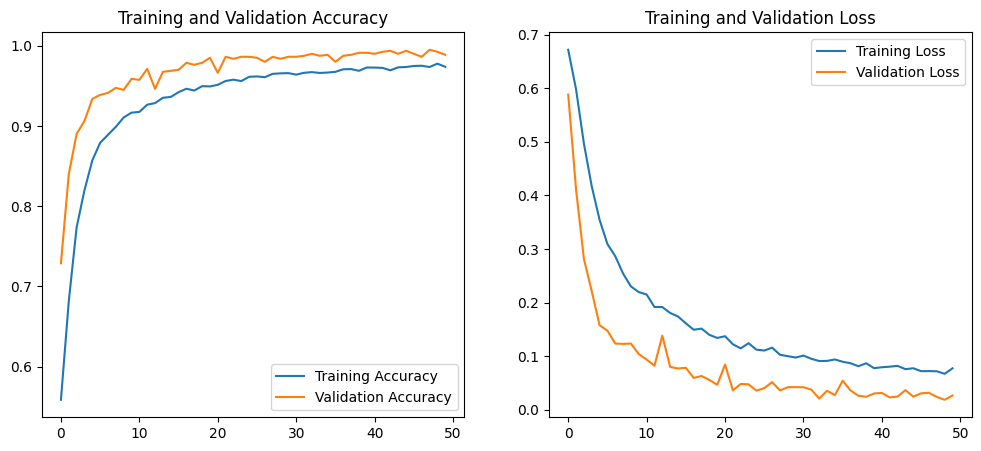

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [ ]:
model.evaluate(val_genrator)

25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 303ms/step - accuracy: 0.9962 - loss: 0.0249


[0.023878857493400574, 0.9950000047683716]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred=model.predict(test_genrator)
y_pred_clases=(y_pred>0.5).astype("int32")
y_true=test_genrator.classes
print('classifcation report',classification_report(y_true,y_pred_clases))
print('confusion_matrix',confusion_matrix(y_true,y_pred_clases))

In [ ]:
'''from tensorflow.keras.preprocessing import image
import numpy as np

img_path = 'your_image.jpg'
img = image.load_img(img_path, target_size=(img_size, img_size), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

prediction = model.predict(img_array)
print("Prediction:", prediction)
'''

'from tensorflow.keras.preprocessing import image\nimport numpy as np\n\nimg_path = \'your_image.jpg\'\nimg = image.load_img(img_path, target_size=(img_size, img_size), color_mode=\'grayscale\')\nimg_array = image.img_to_array(img)\nimg_array = np.expand_dims(img_array, axis=0) / 255.0\n\nprediction = model.predict(img_array)\nprint("Prediction:", prediction)\n'